<a href="https://colab.research.google.com/github/tatyana-ketova/-Education-in-Portugal/blob/main/%20Portugal_among_the_countries_of_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For a project to **assess the level of education in Portugal** (before analysis of Portuguese schoolchildren survey database), I needed to answer the question: What is the level of education in Portugal and how much does it spend GDP on education development in comparison with other countries?

I used data from the UNITED NATIONS DEVELOPMENT PROGRAM website:

1 Education index
 (Human Development Reports, UNITED NATIONS DEVELOPMENT PROGRAMME)
http://hdr.undp.org/en/indicators/149206

2 Government expenditure on education (% of GDP) 
(Human Development Reports, UNITED NATIONS DEVELOPMENT PROGRAMME)
http://hdr.undp.org/en/indicators/149206

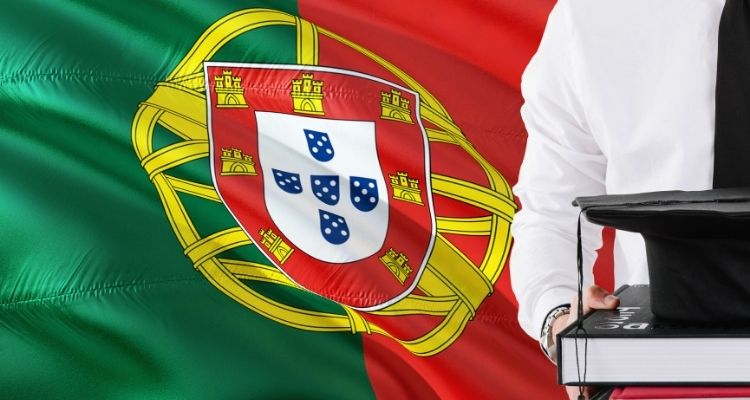

In [ ]:
# Load some libraries I needed
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://numpy.org/
import pandas.io.sql as pd_sql #https://pandas.pydata.org/pandas-docs/version/0.16.0/generated/pandas.io.sql.read_sql.html
import sqlite3 as sql #https://docs.python.org/3/library/sqlite3.html
%load_ext google.colab.data_table
import matplotlib.pyplot as plt 


In [ ]:
pd.__version__#Check API version. This is not necessary at all, but I noticed that there were a lot of tutorial with commands that no longer work. Version is important.

'1.3.5'

In [ ]:
from google.colab import drive #https://colab.research.google.com/notebooks/io.ipynb
drive.mount('/content/drive')

Mounted at /content/drive


STORE CSV PATH IN PANDAS DATAFRAME

In [ ]:
#for df3 (Edu_index)
path = "/content/drive/MyDrive/Edu_index.csv"
df3 = pd.read_csv(path, encoding = "ISO-8859-1")
# Dataset with Education index is now stored in a Pandas Dataframe

In [ ]:
#for df4 (Gov_exp)
path = "/content/drive/MyDrive/Gov_exp.csv"
df4 = pd.read_csv(path, encoding = "ISO-8859-1")
# Dataset with % of GDP is now stored in a Pandas Dataframe

READ CSV INTO SQLITE

In [ ]:
#Read CSV into SQLite
db_conn = sql.connect('world_edu.db')
pd_sql.DataFrame.to_sql(df3,'Edu_index',db_conn, if_exists='replace') # write to DB as table named ""

In [ ]:
# Read CSV into SQLite
db_conn = sql.connect('world_edu.db')
pd_sql.DataFrame.to_sql(df4,'Gov_exp',db_conn, if_exists='replace') # write to DB as table named """"

CONTENTS of each CSV file


In [ ]:
#for df3 (Edu_index)
print (df3.columns) #print columns name

Index(['HDI_Rank', 'Country', 'Y_1990', 'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994',
       'Y_1995', 'Y_1996', 'Y_1997', 'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001',
       'Y_2002', 'Y_2003', 'Y_2004', 'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008',
       'Y_2009', 'Y_2010', 'Y_2011', 'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015',
       'Y_2016', 'Y_2017', 'Y_2018', 'Y_2019'],
      dtype='object')


In [ ]:
#for df4 (Gov_exp)
print (df4.columns) #print columns name

Index(['HDI_Rank', 'Country', 'Y_1990', 'Y_1995', 'Y_2000', 'Y_2005', 'Y_2010',
       'Y_2011', 'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016', 'Y_2017',
       'Y_2018', 'Y_2013_2018'],
      dtype='object')


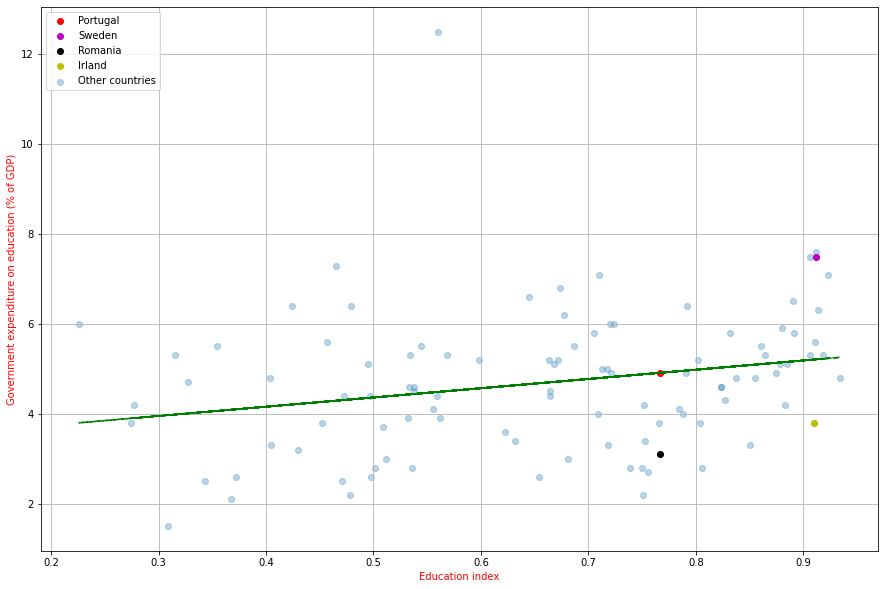

In [ ]:


df5=pd.read_sql(
    """

    SELECT Edu_index.Country, Edu_index.Y_2015 AS INDEX_EDU, Gov_exp.Y_2015 AS EXP_COV
    FROM Edu_index
    INNER JOIN Gov_exp
    ON Gov_exp.Country=Edu_index.Country
    WHERE Gov_exp.Y_2015 IS NOT NULL
    
    """, db_conn) #select data for 2015 from two tables, joining them by country

plt.figure(figsize=(15, 10))

plt.scatter(df5['INDEX_EDU'],df5['EXP_COV'],  alpha = 0.3)
#abscissa axis - The education index has been measured by combining average adult years of schooling with expected years of schooling for students under the age of 25, each receiving 50% weighting. (2015 year)
#ordinate axis - Current, capital and transfer spending on education, expressed as a percentage of GDP.(2015 year)

plt.xlabel('Education index', color='red')
plt.ylabel('Government expenditure on education (% of GDP)',color='red')
# add labels

plt.grid(True)

plt.plot(0.767,4.9,'ro')
plt.plot(0.912,7.5,'mo')
plt.plot(0.767,3.1,'ko')
plt.plot(0.91,3.8,'yo')
plt.legend(['Portugal','Sweden','Romania', 'Irland', 'Other countries'], loc=2)
# add legend and selection of individual dots

data = df5[['INDEX_EDU', 'EXP_COV']]
x = data['INDEX_EDU']
y = data['EXP_COV']
#determine x and y for trend line overlay

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# calculating value of coefficients in case of linear polynomial
plt.plot(x,p(x),"g--")

plt.show()





When I plotted the trend line, we found that Portugal is on the trend line, which means that Portugal spends enough money on education, which was the reason to look for other ways to increase the desire of children to study more and get better grades in order to fulfill this desire